In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
titanic_df = pd.read_csv("train.csv")

In [ ]:
# survived --- 0 = false, 1 = true
# SibSp(siblings on board) --- 0 = false, 1 = true
# Parch(Parents/Child on board) --- 0 = false, 1 = true
# Cabin --- A, B, C, D, E, F, G decks
# Embarked --- S, C, Q are cities
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Basic Questions

# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?

# More in-depth questions

# 5.) What factors helped someone survive the sinking?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

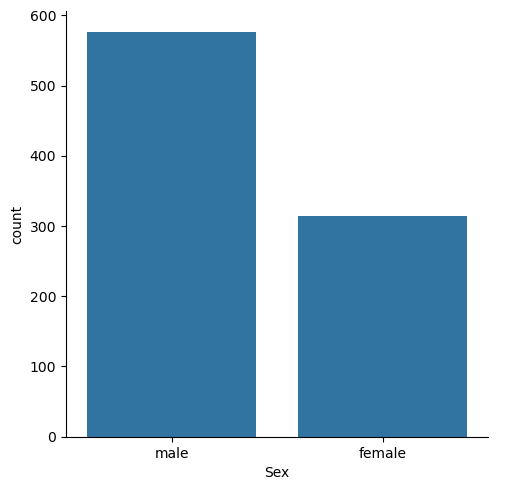

In [16]:
sns.catplot(data = titanic_df, x="Sex", kind="count")
plt.show()

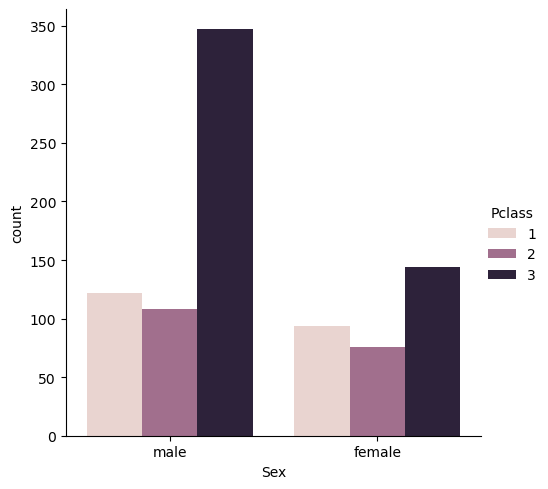

In [17]:
sns.catplot(data = titanic_df, x="Sex", kind="count", hue="Pclass")
plt.show()

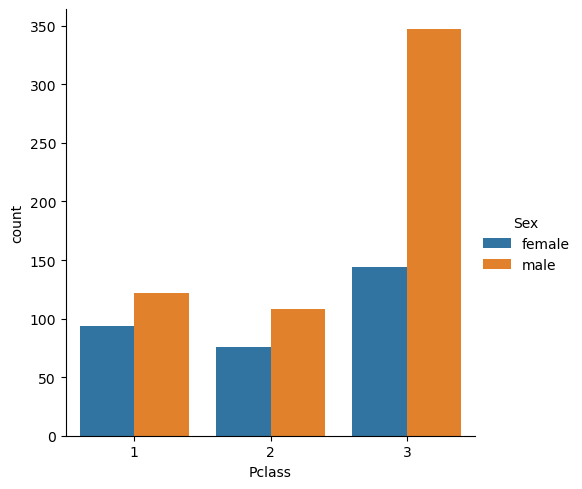

In [18]:
sns.catplot(data = titanic_df, x="Pclass", kind="count", hue="Sex")
plt.show()

In [19]:
def male_female_child(passenger):
    age, sex = passenger

    if age < 16:
        return "Child"
    else:
        return sex

In [22]:
# add person column to df, values gathered by function above
titanic_df["person"] = titanic_df[["Age", "Sex"]].apply(male_female_child, axis = 1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


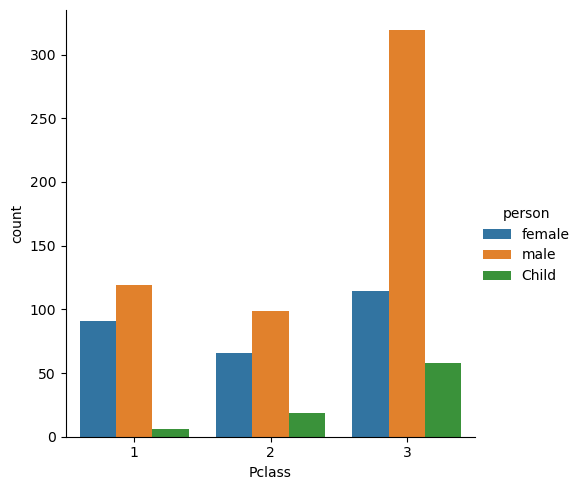

In [24]:
sns.catplot(data = titanic_df, x = "Pclass", hue="person", kind="count")
plt.show()

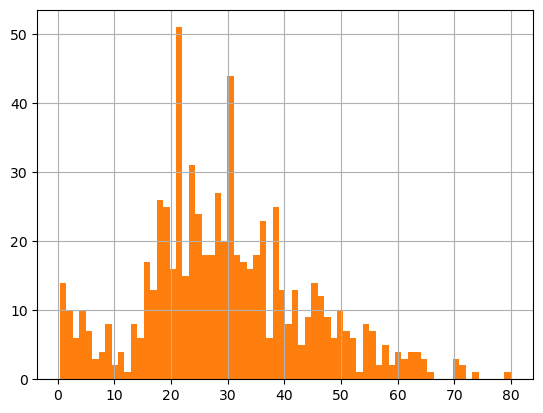

In [26]:
titanic_df["Age"].hist(bins = 70)
plt.show()

In [27]:
titanic_df["Age"].mean()

29.69911764705882

In [28]:
titanic_df["person"].value_counts()

person
male      537
female    271
Child      83
Name: count, dtype: int64